実施予定日： 2018/05/28

- 記入者: y-ito, s-kanai

## このノートの目的

- イベント: https://serakumedia.connpass.com/event/88165/
- 元のkernelを読み解き、データ解析（可視化、表現するに有効な特徴量選択）についての理解を深める
    - 元のkernel: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
        - 取り扱うデータセット： 乳がん検査のデジタル画像を元に細胞の特徴を列挙したもの。

![](https://preview.ibb.co/bKsv9k/k.jpg)
# INTRODUCTION
In this data analysis report, I usually focus on feature visualization and selection as a different from other kernels. Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis are used to observe number of components.

**Enjoy your data analysis!!!**



【訳】 序論

このデータ分析レポートでは、通常、私は他のカーネルとは違うものとして、特徴量の視覚化と選択に焦点を当てています。

- 相関による特徴量選択
- 単変量特徴量選択
- 再帰的な特徴量の除去
- クロスバリデーションによる再帰的な特徴量の削除
- 木構造を用いた特徴選択方法

これらは、ランダムなフォレストによる分類処理で良く使用されます。

それとは別に

- Principle Component Analysis (PCA、主成分分析) 

を扱うことで特徴量の個数を検討することができます。

**それではデータの分析をお楽しみください！！！**


【メモ】 

> このデータ分析レポートでは、通常、私は他のカーネルとは違うものとして、

一般的なKernelはコンペのスコアを上げるためのTIPS、モデルの検証などがほとんどのため、

今回のコンペのないデータセットと区別していると思います。


# Data Analysis

In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# 【訳】 このPython3の環境（kaggle kernelのnote）便利なライブラリがインストールされています。
# 内容はこちらで定義されています。: https://github.com/kaggle/docker-python
# 例えば以下の便利なパッケージがロードできます。

import numpy as np # linear algebra 数値計算を効率的に行うための拡張モジュール
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) データセットを操作するためのデータ構造と演算をサポートするモジュール
import seaborn as sns # data visualization library  可視化モジュール
import matplotlib.pyplot as plt # 可視化用関数
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

column_2C_weka.csv
data.csv



In [24]:
data = pd.read_csv('../input/data.csv')

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 
Lets look at features of data.

【訳】 特徴量選択、抽出、そして分類などを行う前にまず基本的なデータ分析から始めます。
データの特徴量を見てみましょう。

In [25]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**There are 4 things that take my attention**

1) There is an **id** that cannot be used for classificaiton 

2) **Diagnosis** is our class label

3) **Unnamed: 32** feature includes NaN so we do not need it.

4) I do not have any idea about other feature names actually I do not need because machine learning is awesome **:)**

Therefore, drop these unnecessary features. However do not forget this is not a feature selection. This is like a browse a pub, we do not choose our drink yet !!!

【訳】 **私の注意を引く点が4つある**

1）分類には使用できない** id **があります

2）**Diagnosis(診断結果)**はクラスラベルです

3）**Unnamed: 32**機能にはNaNが含まれているので、必要ありません。

4）機械学習がすばらしいので、実際には必要ない他の機能名についてはわかりません **：）**

したがって、これらの不要な特徴量を削除してください。 しかし、これは特徴量選択の作業ではないことを忘れないでください。 これはパブを眺めるようなものですが、まだドリンクを選んでいません!!!

【メモ】
> 4) I do not have any idea about other feature names actually I do not need because machine learning is awesome **:)**

他の説明変数については特に理解せずにすすめるよーという理解

ここについては半分同意だけど、半分は反対。（実はこのあと説明していたけれど）

この後データの分布や変数間の相関を見て分析するフェーズにはいるはずなのだけど、
傾向を見つけたときに **データの意味を知っているとその傾向について確信がもてるかもしれない。**

また、データの意味と流石に違うだろという傾向が出たときに、
**データの整形段階で誤った整形しているなどに気づくことができる。**

ただし、意味に捕らわれて時間がかかってしまったり、
本来の目的を忘れて別の調査をしてしまうなどもやりがちなので、
ほどほどにして進めるのが良さそう（レポートの作成者もそんな意図だったのではと思ってる）

In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 個人的には .Tで転置すると表示が見やすい場合もあるのでオススメしたい。
x.head().T

,0,1,2,3,4
radius_mean,17.990000,20.570000,19.690000,11.420000,20.290000
texture_mean,10.380000,17.770000,21.250000,20.380000,14.340000
perimeter_mean,122.800000,132.900000,130.000000,77.580000,135.100000
area_mean,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
smoothness_mean,0.118400,0.084740,0.109600,0.142500,0.100300
compactness_mean,0.277600,0.078640,0.159900,0.283900,0.132800
concavity_mean,0.300100,0.086900,0.197400,0.241400,0.198000
concave points_mean,0.147100,0.070170,0.127900,0.105200,0.104300
symmetry_mean,0.241900,0.181200,0.206900,0.259700,0.180900
fractal_dimension_mean,0.078710,0.056670,0.059990,0.097440,0.058830


In [7]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


Okey, now we have features but **what does they mean** or actually **how much do we need to know about these features**
The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values.
These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the **area_mean** feature's max value is 2500 and **smoothness_mean** features' max 0.16340. Therefore **do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton?** The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.  

(勝手な意訳) 素性(feature)を整形する際に、素性の意味を知っておくと整形の仕方を判断することができる。

それもわかる。1変量のデータの分布についてしか言及していないが、変量間の相関なども素性の意味を知っておくことで
傾向が見えた場合にその傾向についての確信を持てるはず。

In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# これも転置させると全部見れる。
x.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Visualization
In order to visualizate data we are going to use seaborn plots that is not used in other kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.

seabornは便利なので、私もpythonユーザはぜひオススメしたい。matplotlibだといろいろ設定しないとでつらい場合、seabornでいい感じに提供されてることもあるかも。

そして酒ネタ好きな人ですねｗ「まだ飲み始めてるわけではなく、メニューを眺めている段階だよ」という理解。

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

In [10]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [11]:
# それぞれの処理がわかりにくいかもなので、個別に結果を見てみる。
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
"""
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)
"""
# データを縦長にもたせることでseabornのプロットに適した形に整形している。matplotlibやRのggplot2なんかも同じような形で扱うことが多いと思います。
# 項目数が多いので、3つに分けてプロットしている
data

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,radius_mean,-0.768233
4,M,radius_mean,1.748758
5,M,radius_mean,-0.475956
6,M,radius_mean,1.169878
7,M,radius_mean,-0.118413
8,M,radius_mean,-0.319885
9,M,radius_mean,-0.473118


Lets interpret the plot above together. For example, in **texture_mean** feature, median of the *Malignant* and *Benign* looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

In [12]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [13]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

Lets interpret one more thing about plot above, variable of **concavity_worst** and **concave point_worst** looks like similar but how can we decide whether they are correlated with each other or not.
(Not always true but, basically if the features are correlated with each other we can drop one of them)

> (Not always true but, basically if the features are correlated with each other we can drop one of them)

この意味は重回帰分析の分野の用語としてはマルチコとか多重共線性のついて述べているのだと思う。
モデルの構築（パラメタ推定）などがうまく行かなかったり、予測結果の精度が悪かったりしてしまう。

そもそも分類を目的としている場合に、各説明変数は独立変数であるという仮定を置くパターンが多いので
説明変数間で強い相関がある＝独立ではない　となるとそもそもの仮定が矛盾してしまう。

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated.
 Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. 
Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

Pearsonr value: たぶん決定係数のこと。 0-1の間に定まる値。1に近いほど、相関があると言える。

言及しているとおり0.8は強い相関があると言える。

「まだ素性を選んでいるわけでないよ、データを眺めてアイデアを探しているところ」

In [14]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")

What about three or more feauture comparision ? For this purpose we can use pair grid plot. Also it seems very cool :)
And we discover one more thing **radius_worst**, **perimeter_worst** and **area_worst** are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

pair grid plot: 日本語だと散布図行列って書かれてたりするはず。



In [15]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

/Users/itouyuu/.pyenv/versions/3.6.0b3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Up to this point, we make some comments and discoveries on data already. If you like what we did, I am sure swarm plot will open the pub's door :) 

In swarm plot, I will do three part like violin plot not to make plot very complex appearance

日本語だと蜂群図(bee swarm plot)

In [16]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [17]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [18]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

swarm plot time:  162.02172994613647  s


They looks cool right. And you can see variance more clear. Let me ask you a question, **in these three plots which feature looks like more clear in terms of classification.** In my opinion **area_worst** in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, **smoothness_se** in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

ビースワームでこんな見方ができるのか。。たしかに散布図行列見るよりも情報が絞られててよさ。

**What if we want to observe all correlation between features?** Yes, you are right. The answer is heatmap that is old but powerful plot method.

相関係数を色分けしてヒートマップとしたもの。これも昔からよく使われている。

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, finaly we are in the pub and lets choose our drinks at feature selection part while using heatmap(correlation matrix).

# Feature Selection and Random Forest Classification
Today our purpuse is to try new cocktails. For example, we are finaly in the pub and we want to drink different tastes. Therefore, we need to compare ingredients of drinks. If one of them includes lemon, after drinking it we need to eliminate other drinks which includes lemon so as to experience very different tastes.

変数選択のフローをカクテルを飲み比べする例えに。

実際の変数選択も、ある変量を加えてCVの結果みて、その変数を除いて再度CVの結果出して〜を繰り返すので。

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict. 

## 1) Feature selection with correlation and random forest classification

As it can be seen in map heat figure **radius_mean, perimeter_mean and area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and **area_mean** looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier. 

**Compactness_mean, concavity_mean and concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se and area_se** are correlated and I only use **area_se**.  **radius_worst, perimeter_worst and area_worst** are correlated so I use **area_worst**.  **Compactness_worst, concavity_worst and concave points_worst** so I use **concavity_worst**.  **Compactness_se, concavity_se and concave points_se** so I use **concavity_se**. **texture_mean and texture_worst are correlated** and I use **texture_mean**. **area_worst and area_mean** are correlated, I use **area_mean**.




相関がある変数間で、ひとまず1つだけ選び、他の相関のある変数は除外してデータを用意し直す。

In [43]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

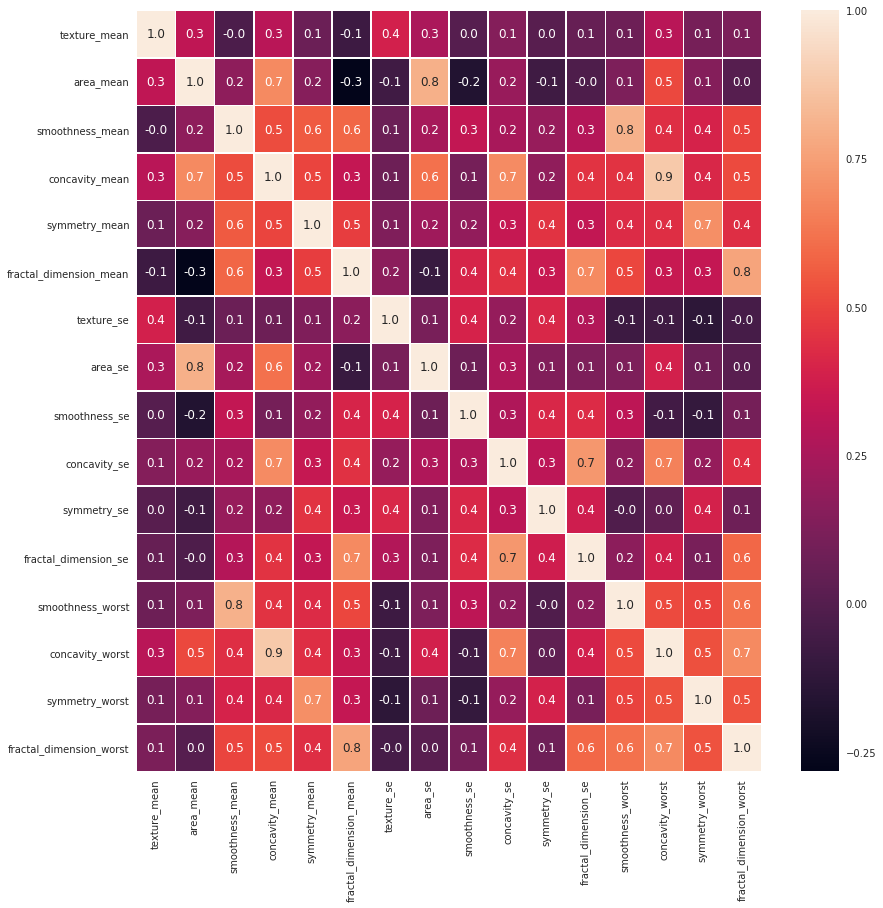

In [44]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but **did we choose correctly ?** Lets use random forest and find accuracy according to chosen features.

Accuracy is:  0.9532163742690059


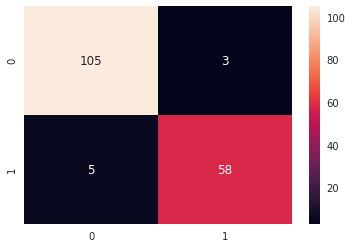

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. 
Now lets see other feature selection methods to find better results.

## 2) Univariate feature selection and random forest classification
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest>

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [49]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Best 5 feature to classify is that **area_mean, area_se, texture_mean, concavity_worst and concavity_mean**. So lets se what happens if we use only these best scored 5 feature.

Accuracy is:  0.935672514619883


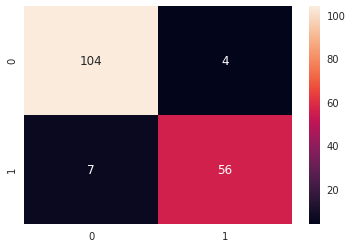

In [50]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is almost 96% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar.
Now lets see other feature selection methods to find better results.

## 3) Recursive feature elimination (RFE) with random forest
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html>
Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

In [ ]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)


In [ ]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen 5 best features by rfe is **texture_mean, area_mean, concavity_mean, area_se, concavity_worst**. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is **5**. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

## 4) Recursive feature elimination with cross validation and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html>
Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

In [ ]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Finally, we find best 11 features that are **texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst** for best classification. Lets look at best accuracy with plot.


In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make **feature selection and understanding data.** Then last make our last feature selection method.

## 5) Tree based feature selection and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
In random forest classification method there is a **feature_importances_** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**


In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features. As I sad before, I give importance to understand features and find best of them. 

# Feature Extraction
<http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>
We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.
 

Text(0,0.5,'explained_variance_ratio_')

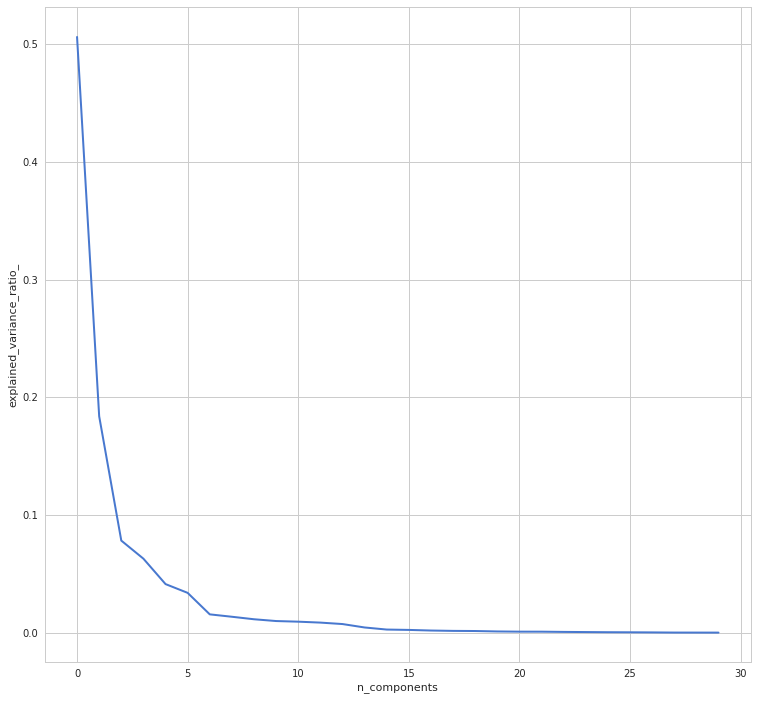

In [51]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

According to variance ration, 3 component can be chosen.

この図の見方はまだ良くわからず。

# Conclusion
Shortly, I tried to show importance of feature selection and data visualization. 
Default data includes 33 feature but after feature selection we drop this number from 33 to 5 with accuracy 95%. In this kernel we just tried basic things, I am sure with these data visualization and feature selection methods, you can easily ecxeed the % 95 accuracy. Maybe you can use other classification methods.
### I hope you enjoy in this kernel
## If you have any question or advise, I will be apreciate to listen them ...